In [31]:
import numpy as np
import matplotlib.pyplot as plt

#### Initialization

I didn't have much time to make ux/ui design for this lab :(
<br>You have to change parameters inside init() by yourself to see how they affect simulation

In [34]:
def init():
    global a, x, t, Nx, dx, dt, Nt, u, batch
    a = 1000        # diffusivity coef.
    x = 100          # mm
    t = 4           # s
    Nx = 20         # nodes
    dx = x/(Nx-1)
    dt = dx**2/a * 0.5      # applying Neumann's stability analysis for 1d heat eq.
    Nt = int(t/dt)+1
    u = np.zeros(Nx) + 20   # rod is initially heat up to 20C
    batch = 5               # batch size

def draw():
    global x, Nx, Nt, batch, times, results
    x_vals = np.linspace(0, x, Nx)
    plt.figure(figsize=(8, 6))

    for i in range(0, Nt, int(Nt/batch)):  # Plot at 5 different time steps
        plt.plot(x_vals, results[i], label=f'Time = {times[i]:.2f}s')

    plt.xlabel('Position along the rod (mm)')
    plt.ylabel('Temperature (°C)')
    plt.title('Temperature Distribution in 1D Rod Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

#### Dirichlet's boundary conditions

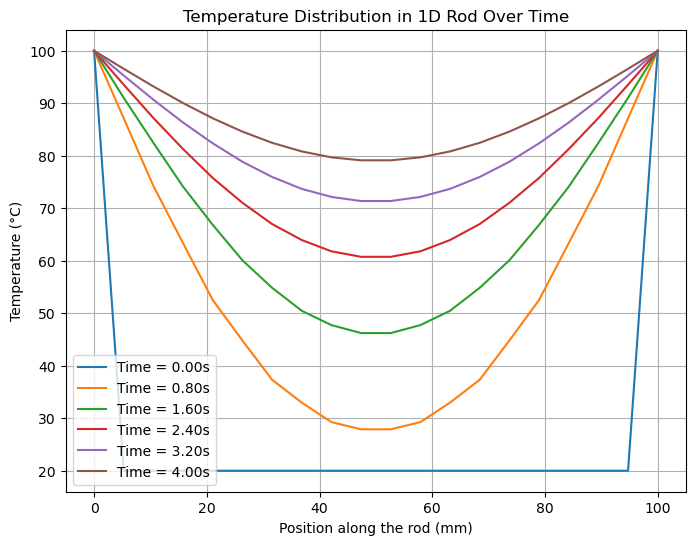

In [35]:
init()
u[0] = 100
u[-1] = 0

results = np.zeros((Nt, Nx))    # to store temperature profile at each step
times = np.linspace(0, t, Nt)   # for time
results[0, :] = u

for n in range(1, Nt):
    w = u.copy()
    for i in range(1, Nx-1):
        u[i] = dt * a * (w[i - 1] - 2 * w[i] + w[i + 1]) / dx ** 2 + w[i]
    
    results[n, :] = u

    # print(f"t: {count}, avg temp: {np.average(u)}")
draw()

#### Neumann's boundary conditions

No heat flux at the boundaries => u[0] = u[1] = 0 and u[-1] = u[-2] = 0

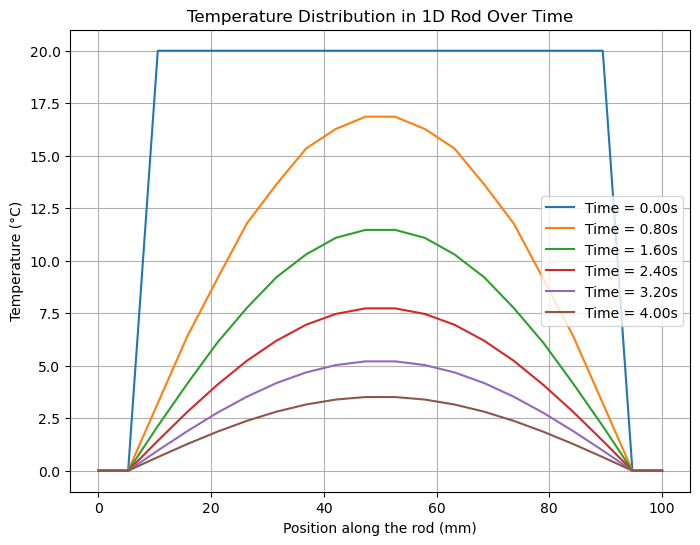

In [36]:
init()

results = np.zeros((Nt, Nx))    # to store temperature profile at each step
times = np.linspace(0, t, Nt)   # for time
u[0] = u[1] = 0
u[-1] = u[-2] = 0
results[0, :] = u


for n in range(1, Nt):
    w = u.copy()
    for i in range(2, Nx-2):
        u[i] = dt * a * (w[i - 1] - 2 * w[i] + w[i + 1]) / dx ** 2 + w[i]

    results[n, :] = u
    # print(f"t: {n}, avg temp: {np.average(u)}")

draw()

#### 2D case (Dirichlet)

In [37]:
def init():
    global Lx, Ly, Nx, Ny, dx, dy, a, t, dt, Nt, u, results
    Lx, Ly = 50, 50 
    Nx, Ny = 20, 20
    dx, dy = Lx/(Nx-1), Ly/(Ny-1)
    a = 400
    t = 4

    dt = min(dx**2, dy**2) / (4 * a)  # Stable time step size
    Nt = int(t/dt) + 1

    # Initialize the temperature field
    u = np.zeros((Nx, Ny)) + 20  # Initial temperature set to 20°C everywhere
    u[0, :] = 100   # Dirichlet boundary condition (top)
    u[-1, :] = 100  # Dirichlet boundary condition (bottom)
    u[:, 0] = 100   # Dirichlet boundary condition (left)
    u[:, -1] = 100  # Dirichlet boundary condition (right)

    results = np.zeros((Nt, Nx, Ny))
    results[0, :, :] = u

def draw(temperature_results, time_steps, batch_size, vmin=20, vmax=100): # To be honest, this part was GPT-ed...
    num_plots = len(time_steps)
    rows = num_plots // batch_size + (num_plots % batch_size > 0)
    
    fig, axes = plt.subplots(rows, batch_size, figsize=(15, 3*rows))
    
    for idx, time_step in enumerate(time_steps):
        row, col = divmod(idx, batch_size)
        ax = axes[row, col] if rows > 1 else axes[col]
        im = ax.imshow(temperature_results[time_step, :, :], cmap='hot', origin='lower', vmin=vmin, vmax=vmax)
        ax.set_title(f'Time Step: {time_step}')
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        fig.colorbar(im, ax=ax, orientation='vertical', label="Temperature (°C)")
    
    plt.tight_layout()
    plt.show()

time_steps_to_plot = list(range(0, Nt, Nt // 20))
batch_size = 5

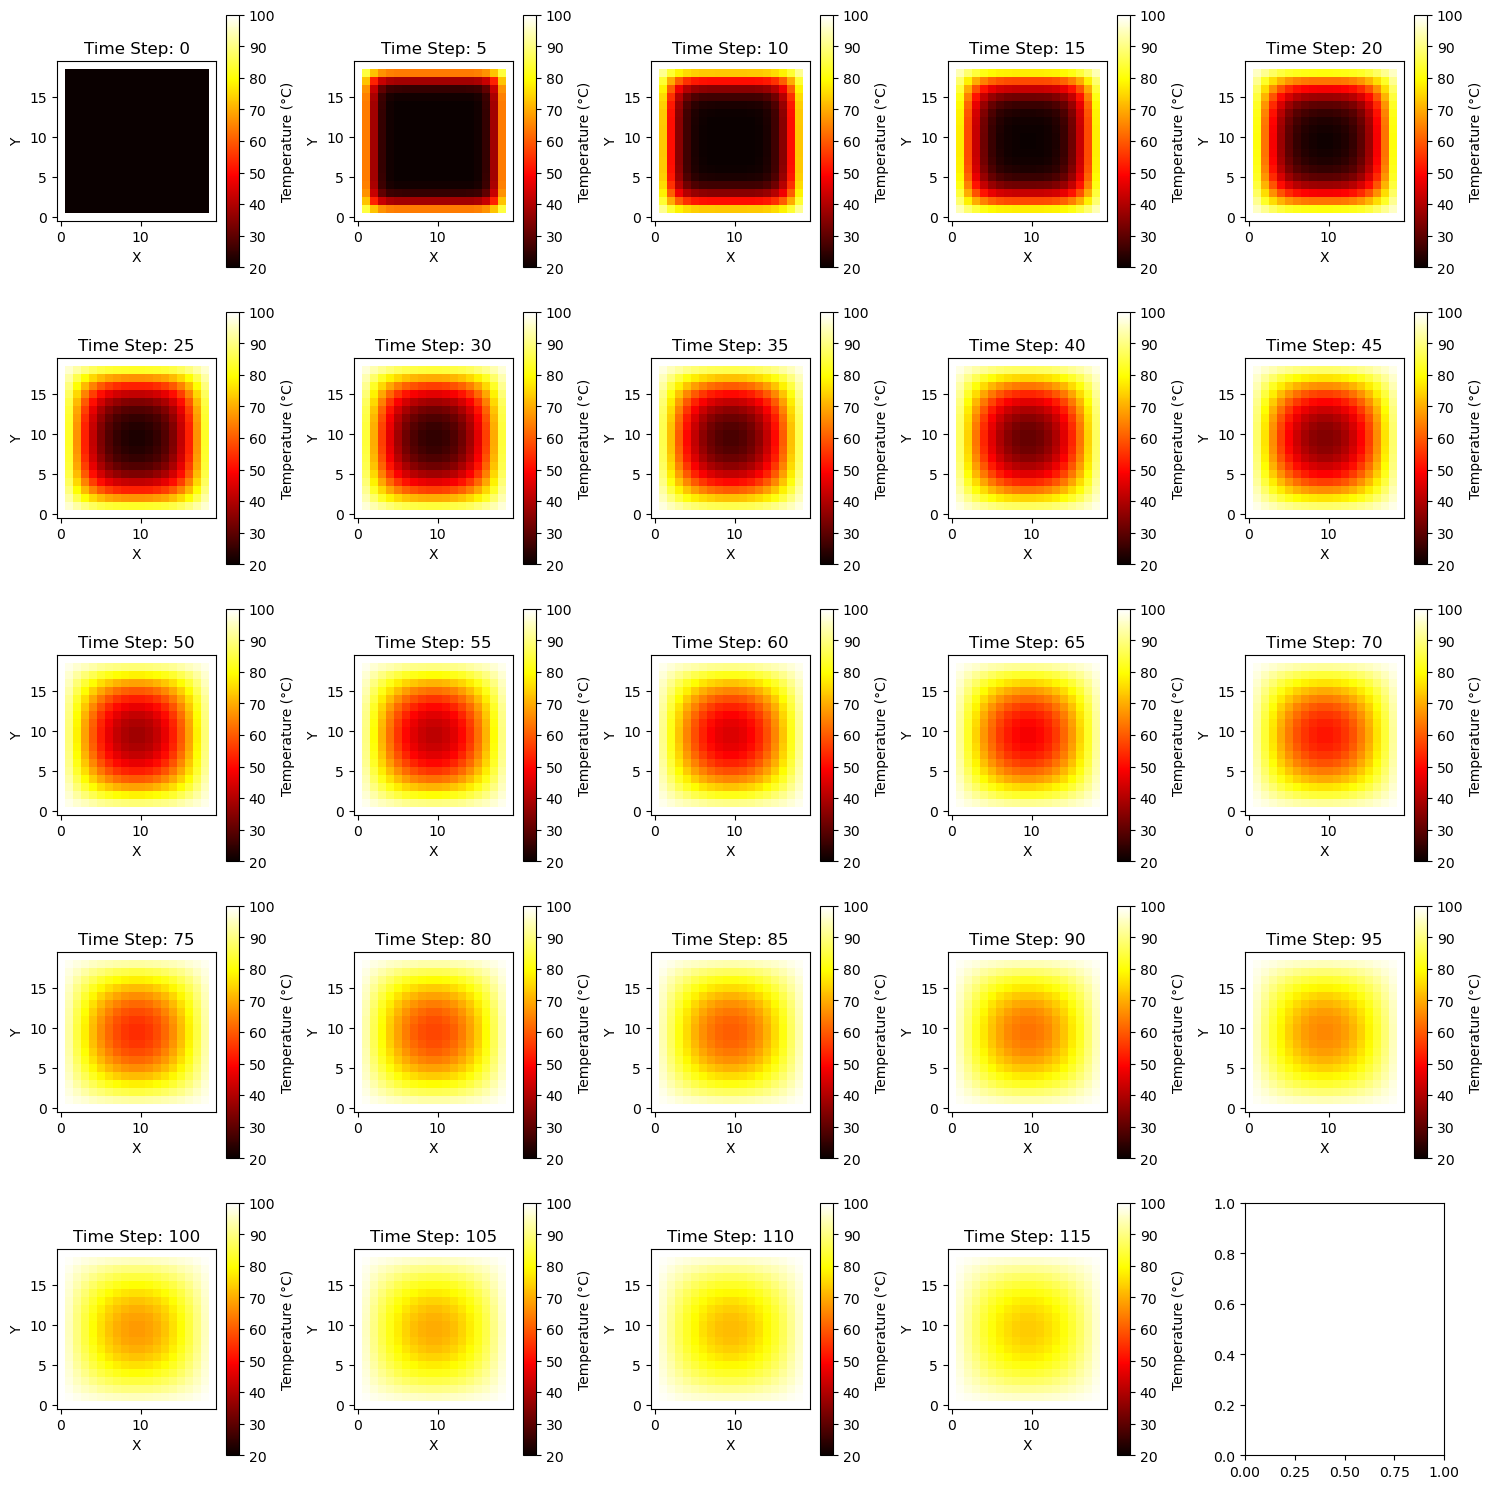

In [38]:
init()
for n in range(1, Nt):
    w = u.copy()
    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            u[i, j] = (w[i, j] +
                       dt * a * ((w[i+1, j] - 2*w[i, j] + w[i-1, j]) / dx**2 +
                                 (w[i, j+1] - 2*w[i, j] + w[i, j-1]) / dy**2))
    
    results[n, :, :] = u


draw(results, time_steps_to_plot, batch_size, vmin=20, vmax=100)


#### Mixed 2D case (Dirichlet + Neumann)

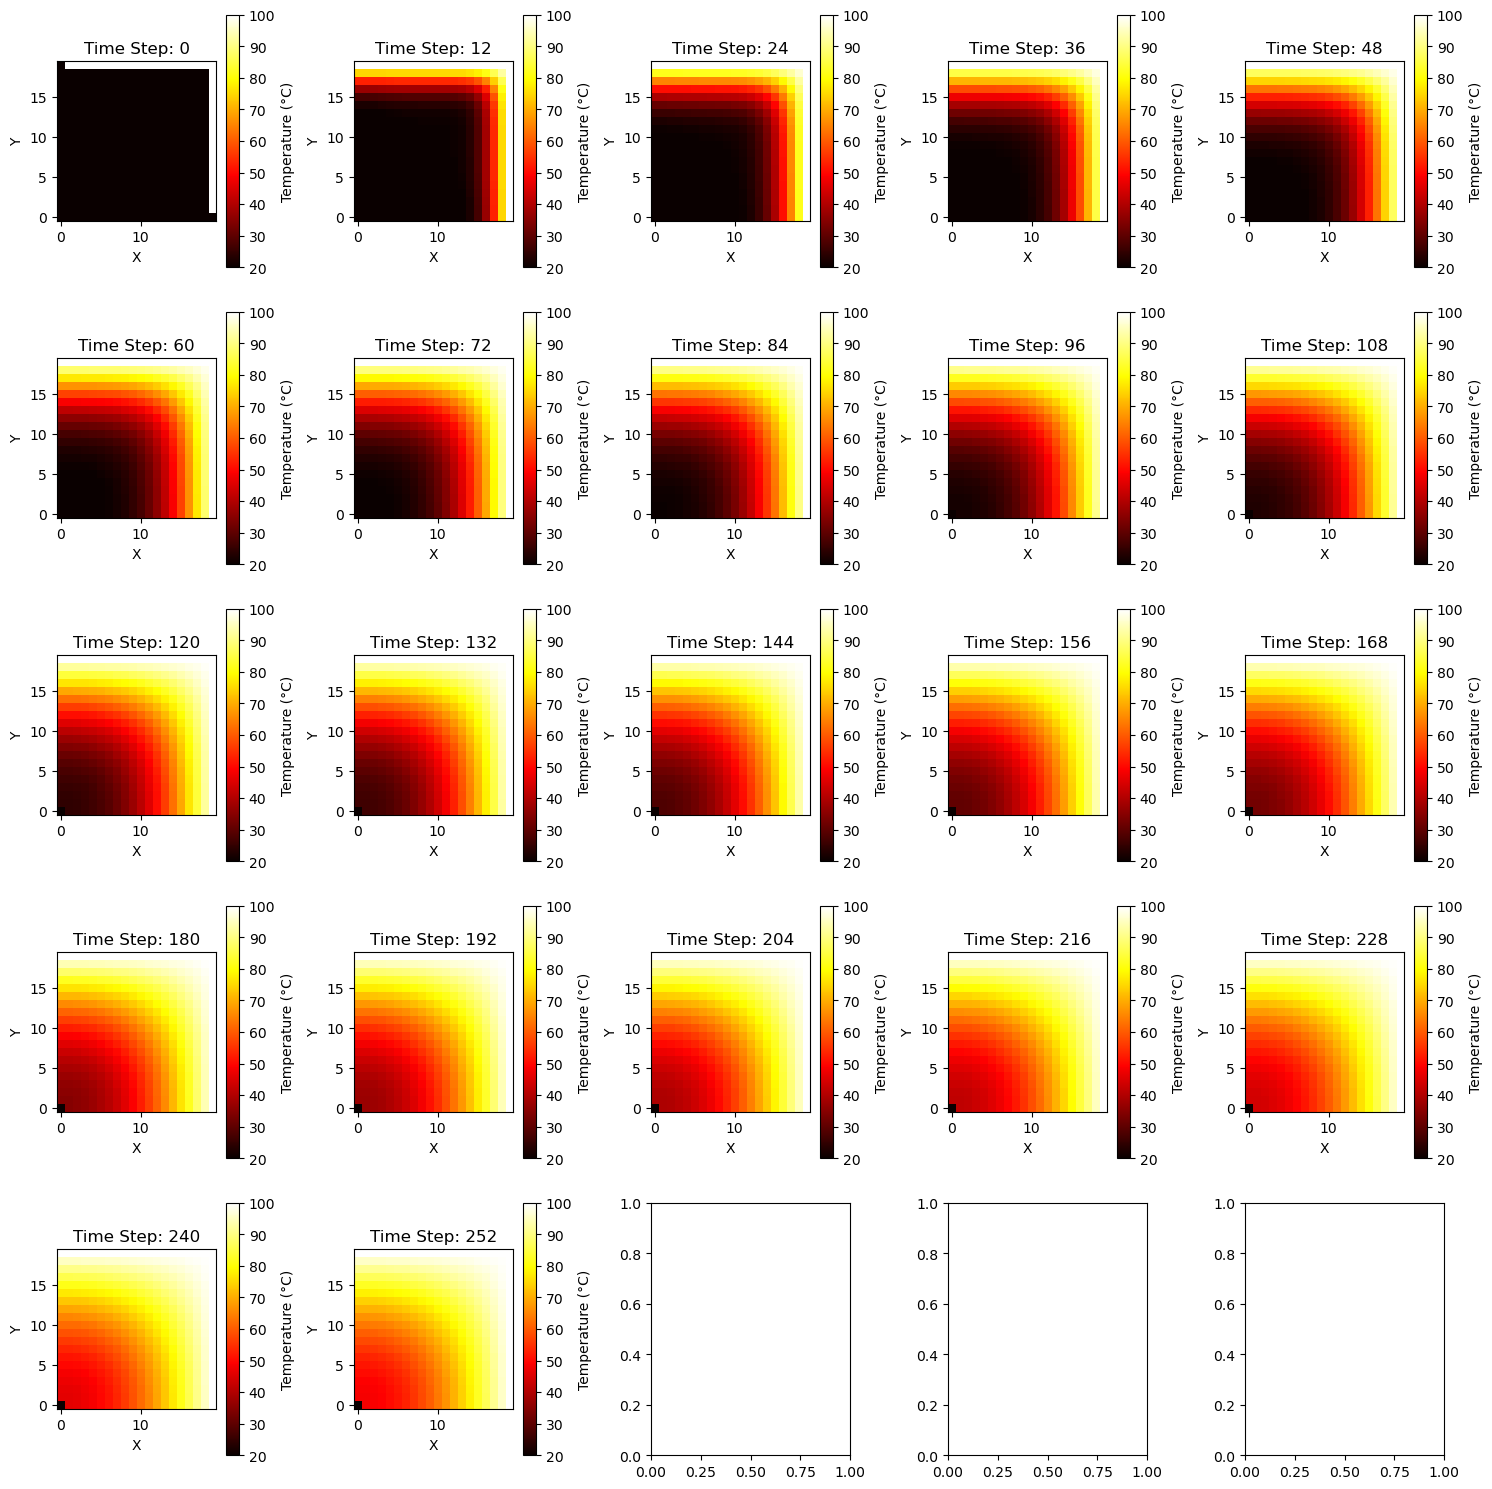

In [30]:
init()
u[0, :] = 0   # Neumann boundary condition (top edge)
u[:, 0] = 0   # Neumann boundary condition (left edge)
results[0, :, :] = u

for n in range(1, Nt):
    w = u.copy()
    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            u[i, j] = (w[i, j] +
                       dt * a * ((w[i+1, j] - 2*w[i, j] + w[i-1, j]) / dx**2 +
                                 (w[i, j+1] - 2*w[i, j] + w[i, j-1]) / dy**2))
    
    u[1:, 0] = u[1:, 1]  # Left boundary: Neumann (∂T/∂x = 0)
    u[0, 1:] = u[1, 1:]  # Top boundary: Neumann (∂T/∂y = 0)
    
    results[n, :, :] = u

draw(results, time_steps_to_plot, batch_size, vmin=20, vmax=100)
